In [2]:
# 1. 파이썬 코드에서 Matplotlib 폰트 설정
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
from itertools import combinations
from collections import Counter

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정이 완료되었습니다.")


한글 폰트 설정이 완료되었습니다.


In [3]:
# 3. 데이터 로드 및 통합 (모든 문제 풀이의 시작점)
# dataframe 확인해라!
try:
    orders_df = pd.read_csv('../data/orders.csv')
    payments_df = pd.read_csv('../data/payments.csv')
    products_df = pd.read_csv('../data/products.csv')
    shipping_df = pd.read_csv('../data/shipping.csv')
    customers_df = pd.read_csv('../data/customers.csv')

    # 모든 데이터프레임 병합
    df = pd.merge(orders_df, payments_df, on='order_id', how='left')
    df = pd.merge(df, products_df, on='product_id', how='left')
    df = pd.merge(df, customers_df, on='customer_id', how='left')
    df = pd.merge(df, shipping_df, on='order_id', how='left')

    # 데이터 전처리
    date_cols = ['order_date', 'payment_date', 'join_date', 'shipping_start_date', 'shipping_end_date']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    df['total_sales'] = df['quantity'] * df['price']
    
    print("데이터 로드 및 통합이 완료되었습니다.")

except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")


데이터 로드 및 통합이 완료되었습니다.


In [ ]:
# 문제 8: 주문이 가장 많이 발생하는 시간대와 해당 시간대에 가장 잘 팔리는 상품 카테고리를 분석하세요.
# 비즈니스 목적: 시간 기반 타겟 마케팅 전략(예: 점심시간 쿠폰, 퇴근길 푸시 알림)을 수립하는 데 활용합니다.

- 출력 결과 : 

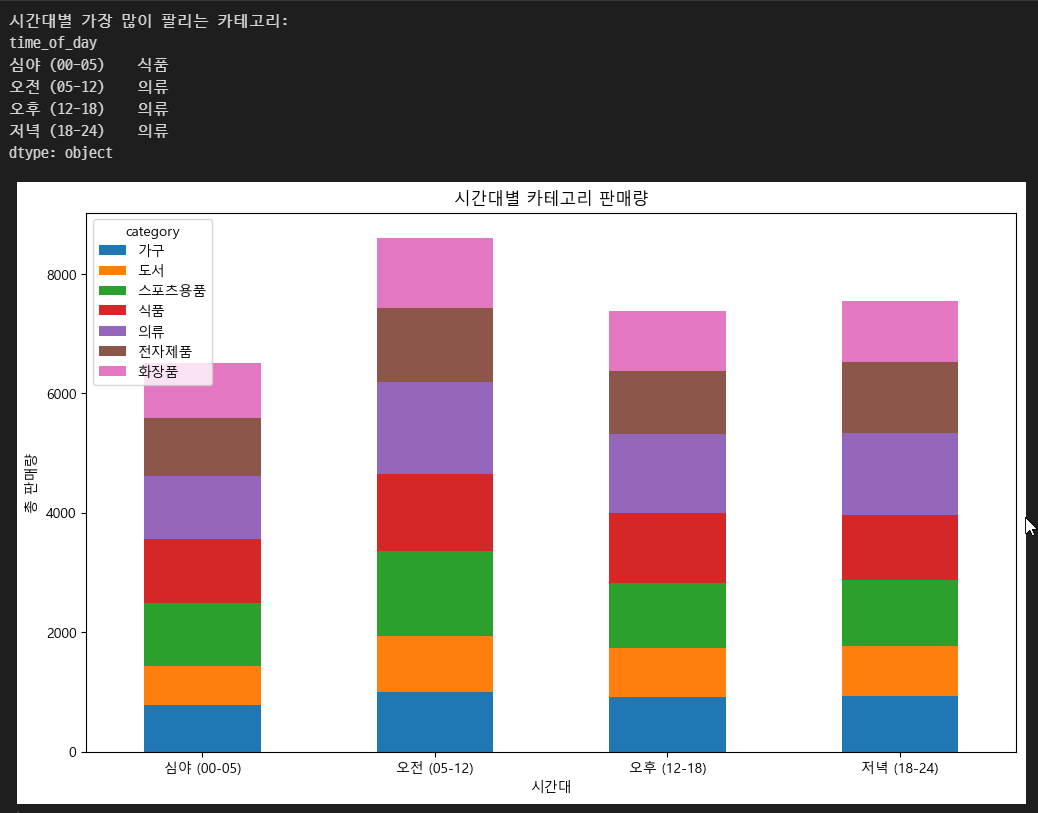

In [ ]:
# 주문이 가장 많이 발생하는 시간대 
# time_of_day : 
'''
시간대별 가장 많이 팔리는 카테고리:
time_of_day
심야 (00-05)    식품
오전 (05-12)    의류
오후 (12-18)    의류
저녁 (18-24)    의류
dtype: object
''' 

In [17]:
# 필요한 데이터만 분리
df_quest8 = df[['order_date','category', 'quantity']].copy() # 그냥 했더니만 SettingWithCopyWarning 났음
df_quest8 # 검증


,order_date,category,quantity
0,2023-10-20 09:41:43,화장품,1
1,2023-10-20 11:14:49,스포츠용품,1
2,2023-10-20 13:26:26,스포츠용품,5
3,2023-10-20 13:55:14,스포츠용품,1
4,2023-10-20 14:12:47,식품,2
...,...,...,...
9995,2025-10-19 09:01:57,도서,2
9996,2025-10-19 10:26:35,의류,3
9997,2025-10-19 11:29:35,화장품,5
9998,2025-10-19 12:20:49,화장품,3


In [18]:
# 시간 추출 후 시간대 구분
df_quest8['time_of_day'] = pd.cut(
    df_quest8['order_date'].dt.hour,  # 시간(0-23) 추출
    bins=[0, 5, 12, 18, 24],  # 구간 경계값
    labels=['심야 (00-05)', '오전 (05-12)', '오후 (12-18)', '저녁 (18-24)'],  # 구간 이름
    right=False,  # 왼쪽 포함, 오른쪽 미포함 (0<=x<5, 5<=x<12, ...)
    include_lowest=True  # 최소값(0) 포함
)
df_quest8 # 검증


,order_date,category,quantity,time_of_day
0,2023-10-20 09:41:43,화장품,1,오전 (05-12)
1,2023-10-20 11:14:49,스포츠용품,1,오전 (05-12)
2,2023-10-20 13:26:26,스포츠용품,5,오후 (12-18)
3,2023-10-20 13:55:14,스포츠용품,1,오후 (12-18)
4,2023-10-20 14:12:47,식품,2,오후 (12-18)
...,...,...,...,...
9995,2025-10-19 09:01:57,도서,2,오전 (05-12)
9996,2025-10-19 10:26:35,의류,3,오전 (05-12)
9997,2025-10-19 11:29:35,화장품,5,오전 (05-12)
9998,2025-10-19 12:20:49,화장품,3,오후 (12-18)


In [38]:
# 시간대별 가장 많이 팔린 카테고리 DF 만들기 
df_time_category_sales = (
    df_quest8.groupby(['time_of_day', 'category'], observed=True)  # 시간대, 카테고리별 그룹화
    ['quantity'].sum()  # 수량 합계
    .reset_index()  # DataFrame으로 변환
    .sort_values(['time_of_day', 'quantity'], ascending=[True, False])  # 시간대별로 정렬 후 수량 내림차순
)
df_time_category_sales

,time_of_day,category,quantity
3,심야 (00-05),식품,1080
4,심야 (00-05),의류,1059
2,심야 (00-05),스포츠용품,1048
5,심야 (00-05),전자제품,961
6,심야 (00-05),화장품,922
0,심야 (00-05),가구,778
1,심야 (00-05),도서,655
11,오전 (05-12),의류,1536
9,오전 (05-12),스포츠용품,1411
10,오전 (05-12),식품,1291


In [40]:
# DF 에서 시간대별 가장 많이 팔린 첫번째의 'category'만 가져오기 
time_of_day = (
    df_time_category_sales    
    .groupby('time_of_day', observed=True)  # 시간대별 그룹화
    .first()  # 각 그룹의 첫 번째 행
    ['category']  # category 컬럼만 선택
)
time_of_day.name = None  # Series 이름 제거

print("시간대별 가장 많이 팔리는 카테고리:")
print(time_of_day)

시간대별 가장 많이 팔리는 카테고리:
time_of_day
심야 (00-05)    식품
오전 (05-12)    의류
오후 (12-18)    의류
저녁 (18-24)    의류
dtype: object


In [66]:
# chart_df = df_time_category_sales.groupby(['time_of_day', 'category'], observed=True)['quantity'].sum().reset_index()
# chart_df
# 피벗 테이블로 변환: 시간대 x 카테고리
pivot_df = df_time_category_sales.pivot(index='time_of_day', columns='category', values='quantity').fillna(0)
pivot_df


,time_of_day,category,quantity
0,심야 (00-05),가구,778
1,심야 (00-05),도서,655
2,심야 (00-05),스포츠용품,1048
3,심야 (00-05),식품,1080
4,심야 (00-05),의류,1059
5,심야 (00-05),전자제품,961
6,심야 (00-05),화장품,922
7,오전 (05-12),가구,993
8,오전 (05-12),도서,948
9,오전 (05-12),스포츠용품,1411


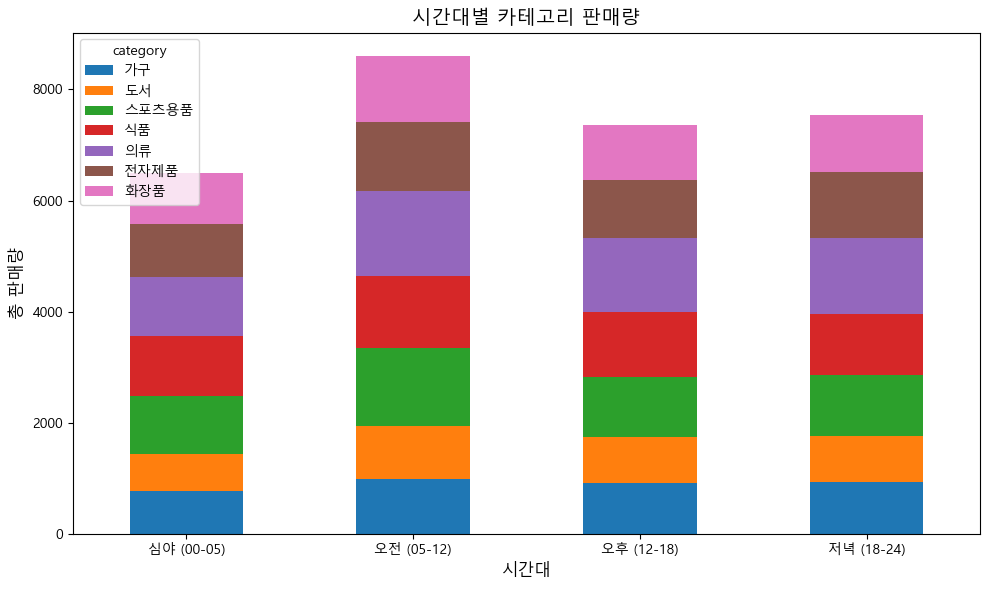

In [68]:
# 누적 막대 그래프 그리기
# chart_df.plot(kind='bar', x='time_of_day', y='quantity')
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked='True', ax=ax)

# 제목 및 라벨
ax.set_title('시간대별 카테고리 판매량', fontsize=14)
ax.set_xlabel('시간대', fontsize=12)
ax.set_ylabel('총 판매량', fontsize=12)

# 범례 위치 조정 (ax 기준으로)
ax.legend(title='category', loc='upper left')

# 기타 스타일
# ax.grid(axis='y', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

